# Image Loading

This Notebook is designed to demonstrate how to handle image loading for computer vision tasks, focusing particularly on a binary classification problem. The procedure includes loading, resizing, displaying, and analyzing image datasets to provide insights into their characteristics.

## Overview of the Notebook

### 1. Environment Setup and Library Imports
We begin by setting up our environment and importing necessary libraries:
- `os` for directory manipulation.
- `cv2` (OpenCV) for image operations.
- `pandas` for data handling.
- `matplotlib` for visualizations.

### 2. Functions for Image Loading and Processing
- `load_images`: Loads images from specified subdirectories (representing classes) maintaining their original size.
- `load_and_resize_images`: Extends `load_images` to resize each image to a uniform dimension (1200x1200 pixels), essential for consistent input size in computer vision algorithms.

### 3. Displaying Images
- The notebook contains two versions of the `display_images` function. The first displays a specified number of images directly. The second ensures balanced visualization by shuffling and selectively displaying an equal number of images from each category (cats and dogs).

### 4. Describing the Image Dataset
- Initially, we describe basic dataset characteristics such as the number of images and the dimensions of the first image.
- An enhanced version of `describe_images` identifies and reports all unique image dimensions within the dataset, helping in understanding the diversity in image sizes and necessary preprocessing.

### 5. Execution and Visualization
- Functions are executed to load images from training and testing directories, display subsets of these images, and describe the datasets' characteristics.
- The process is repeated with resized images to demonstrate the impact of resizing on uniformity and dataset consistency.

## Conclusion

This notebook provides a practical approach to managing image data, emphasizing essential preprocessing steps for preparing data for machine learning models in computer vision. The detailed implementations and direct outputs equip users with a comprehensive toolkit for any image classification tasks using Google Colab.


In [10]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import random

In [3]:
base_dir = '/path/do/the/image/datasets/'

In [10]:
# Function to load images from subdirectories (classes)
# This function loads images in their original size
def load_images(base_dir, subfolder):
    classes = ['cats', 'dogs']  # Subdirectories for classes
    images = []
    for cls in classes:
        class_dir = os.path.join(base_dir, subfolder, cls)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append((img, cls))
    return images

In [4]:
# Function to load images and resize them to same size
def load_and_resize_images(base_dir, subfolder, size=(1200, 1200)):
    classes = ['cats', 'dogs']
    images = []
    for cls in classes:
        class_dir = os.path.join(base_dir, subfolder, cls)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                # Resize image to the specified size
                resized_img = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
                images.append((resized_img, cls))
    return images

In [16]:
# Function to display images
def display_images(image_tuples, number=5):
    plt.figure(figsize=(20, 10))
    for i, (image, label) in enumerate(image_tuples[:number]):
        plt.subplot(1, number, i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(label)
    plt.show()

In [5]:
# Function to display images
def display_images(image_tuples, number=4):
    plt.figure(figsize=(20, 10))
    # Shuffle the list to get a random sample of images
    random.shuffle(image_tuples)
    selected_images = []

    # Attempt to select an equal number of images from each label
    count_cats = count_dogs = number // 2

    for img, label in image_tuples:
        if label == 'cats' and count_cats > 0:
            selected_images.append((img, label))
            count_cats -= 1
        elif label == 'dogs' and count_dogs > 0:
            selected_images.append((img, label))
            count_dogs -= 1
        if len(selected_images) == number:
            break

    # Display the selected images
    for i, (image, label) in enumerate(selected_images):
        plt.subplot(1, number, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(label)
    plt.show()

In [6]:
# Function to describe images
def describe_images(images):
    print("Number of images:", len(images))
    if images:
        img_shape = images[0][0].shape
        print("Image dimensions:", img_shape)

In [7]:
# Function to describe images
# Return dimensions of all images
def describe_images(images):
    print("Number of images:", len(images))
    unique_dimensions = set()
    for img, label in images:
        unique_dimensions.add(img.shape)
    print("Unique image dimensions:", unique_dimensions)

In [11]:
# Load images from train and test directories
train_images = load_images(base_dir, 'train')
test_images = load_images(base_dir, 'test')
print(f'Loaded {len(train_images)} training images and {len(test_images)} testing images')

Loaded 557 training images and 140 testing images


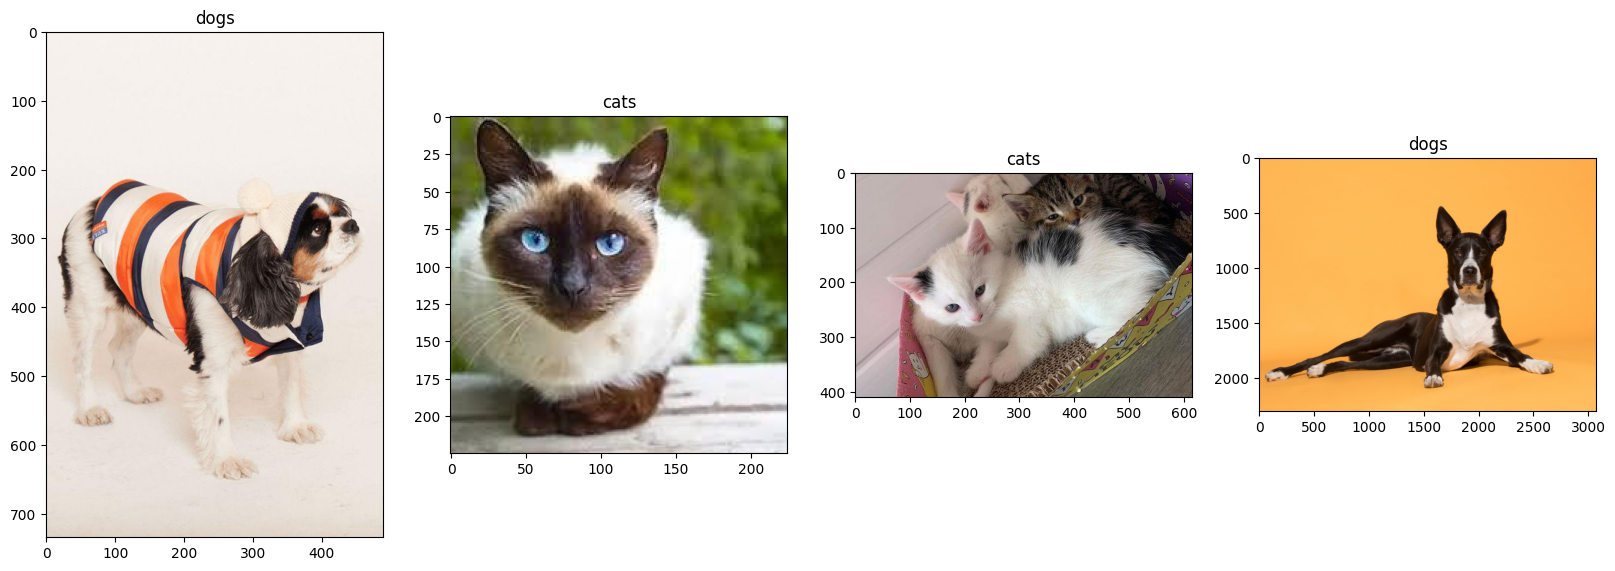

In [31]:
display_images(train_images + test_images)

In [34]:
describe_images(train_images + test_images)

Number of images: 697
Unique image dimensions: {(1488, 2400, 3), (1334, 2000, 3), (1354, 2215, 3), (480, 640, 3), (195, 259, 3), (182, 277, 3), (938, 1500, 3), (429, 640, 3), (525, 700, 3), (536, 599, 3), (820, 2560, 3), (641, 640, 3), (1001, 1500, 3), (413, 620, 3), (550, 728, 3), (1211, 1200, 3), (163, 310, 3), (654, 980, 3), (1200, 800, 3), (340, 343, 3), (1080, 1080, 3), (200, 252, 3), (187, 270, 3), (194, 260, 3), (156, 324, 3), (367, 550, 3), (600, 1160, 3), (1080, 1920, 3), (480, 1366, 3), (2025, 3600, 3), (658, 848, 3), (720, 1200, 3), (243, 207, 3), (1500, 1000, 3), (642, 1000, 3), (3072, 2304, 3), (382, 500, 3), (162, 191, 3), (372, 660, 3), (627, 1200, 3), (876, 1200, 3), (450, 800, 3), (600, 1024, 3), (549, 732, 3), (410, 783, 3), (280, 574, 3), (507, 900, 3), (244, 207, 3), (232, 218, 3), (1000, 2000, 3), (600, 1065, 3), (1067, 1600, 3), (321, 480, 3), (1125, 1500, 3), (207, 243, 3), (840, 1200, 3), (174, 231, 3), (400, 750, 3), (340, 510, 3), (354, 500, 3), (2000, 3000, 3

In [8]:
train_images = load_and_resize_images(base_dir, 'train')
test_images = load_and_resize_images(base_dir, 'test')
print(f'Loaded {len(train_images)} training images and {len(test_images)} testing images')

Loaded 557 training images and 140 testing images


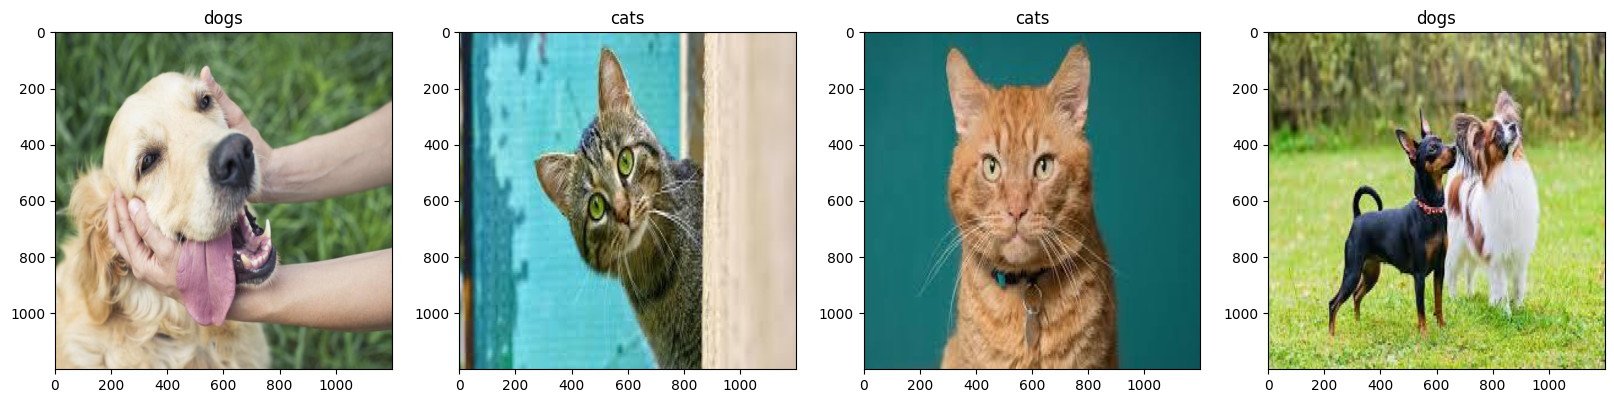

In [11]:
display_images(train_images + test_images)

In [12]:
describe_images(train_images + test_images)

Number of images: 697
Unique image dimensions: {(1200, 1200, 3)}
